# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    # Run an API request for each of the cities
    # Create endpoint URL with each city
    city_url =f"{url}&q={city}"
    try:
        # Parse the JSON and retrieve data
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | callao
Processing Record 2 of Set 1 | carolina beach
Processing Record 3 of Set 1 | suong
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | cold lake
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | flying fish cove
Processing Record 12 of Set 1 | port augusta
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | punta del este
Processing Record 15 of Set 1 | sandnessjoen
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | berbera
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | mildura
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | xiuyan
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,callao,-12.0667,-77.1500,22.16,83,0,6.69,PE,1737591704
1,carolina beach,34.0352,-77.8936,-2.74,66,99,5.69,US,1737591706
2,suong,11.9115,105.6533,20.65,55,100,0.61,KH,1737591707
3,lebu,-37.6167,-73.6500,15.25,83,33,0.76,CL,1737591450
4,adamstown,-25.0660,-130.1015,25.02,79,8,3.85,PN,1737591709


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,22.16,83,0,6.69,PE,1737591704
1,carolina beach,34.0352,-77.8936,-2.74,66,99,5.69,US,1737591706
2,suong,11.9115,105.6533,20.65,55,100,0.61,KH,1737591707
3,lebu,-37.6167,-73.6500,15.25,83,33,0.76,CL,1737591450
4,adamstown,-25.0660,-130.1015,25.02,79,8,3.85,PN,1737591709


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

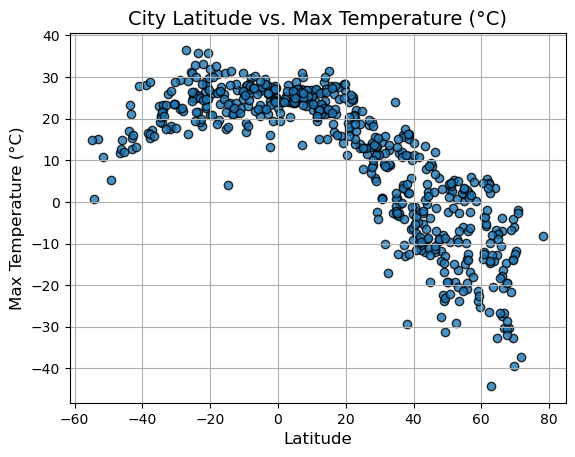

In [13]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

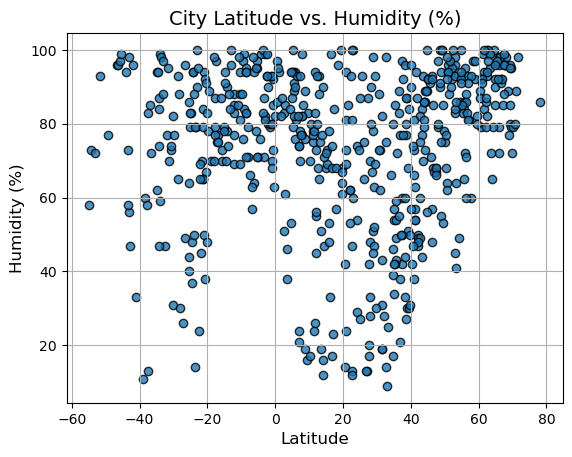

In [27]:
# Build the scatter plots for latitude vs. humidity
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

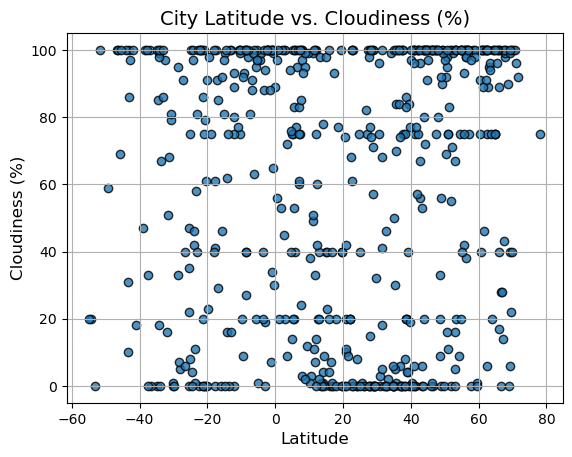

In [26]:
# Build the scatter plots for latitude vs. cloudiness
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

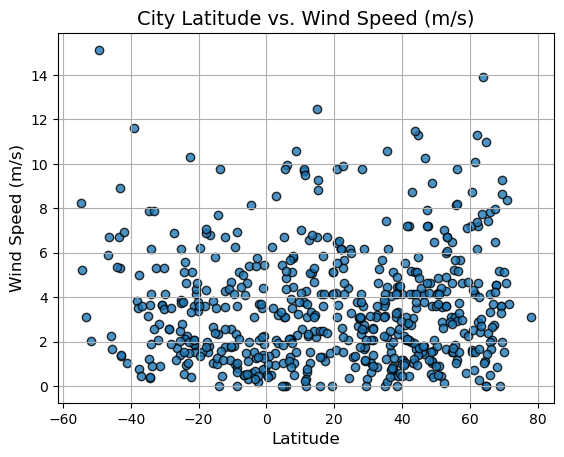

In [25]:
# Build the scatter plots for latitude vs. wind speed
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, output_file):
    """
    Creates a scatter plot with a linear regression line, displaying the equation and r-value.

    Parameters:
    x_values: array-like
        Independent variable values (e.g., Latitude).
    y_values: array-like
        Dependent variable values (e.g., Temperature).
    title: str
        Title of the plot.
    xlabel: str
        Label for the x-axis.
    ylabel: str
        Label for the y-axis.
    output_file: str
        File path to save the output plot.
    """
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}")
    
    # Incorporate other graph properties
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carolina beach,34.0352,-77.8936,-2.74,66,99,5.69,US,1737591706
2,suong,11.9115,105.6533,20.65,55,100,0.61,KH,1737591707
5,utrik,11.2278,169.8474,26.40,78,49,9.66,MH,1737591710
7,cold lake,54.4502,-110.2017,-6.03,86,75,3.09,CA,1737591713
8,ilulissat,69.2167,-51.1000,-3.99,80,40,3.60,GL,1737591714


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,22.16,83,0,6.69,PE,1737591704
3,lebu,-37.6167,-73.6500,15.25,83,33,0.76,CL,1737591450
4,adamstown,-25.0660,-130.1015,25.02,79,8,3.85,PN,1737591709
6,uturoa,-16.7333,-151.4333,27.65,77,29,6.79,PF,1737591711
9,carnarvon,-24.8667,113.6333,26.44,83,100,2.79,AU,1737591715


###  Temperature vs. Latitude Linear Regression Plot

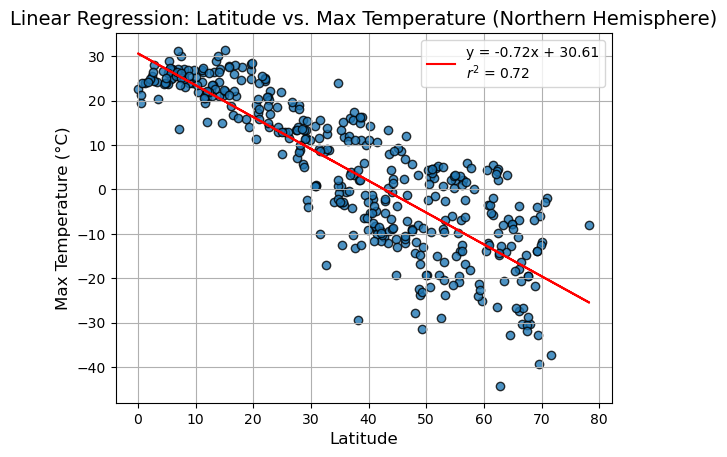

In [16]:
# Linear regression on Northern Hemisphere
# Perform linear regression for Latitude vs. Max Temperature in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Max Temp"],           # Dependent variable: Max Temperature
    "Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Max Temperature (°C)",                 # y-axis label
    "output_data/Fig_North_Lat_Temp_Linear_Regression.png"    # Output file path
)

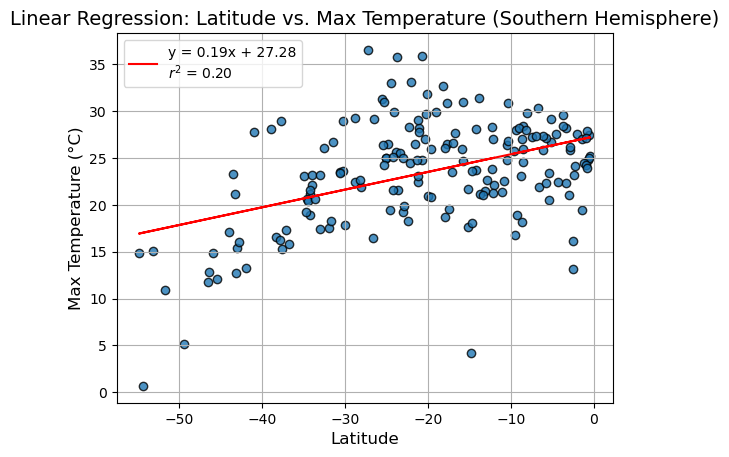

In [18]:
# Linear regression on Southern Hemispher
# Perform linear regression for Latitude vs. Max Temperature in Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Max Temp"],           # Dependent variable: Max Temperature
    "Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Max Temperature (°C)",                 # y-axis label
    "output_data/Fig_South_Lat_Temp.png"    # Output file path
)

 **Northern Hemisphere:**
In the Northern Hemisphere, there is a strong negative linear relationship between the variables, suggesting that an increase in x is associated with a significant decrease in y.

**Southern Hemisphere:**
In the Southern Hemisphere, there is a moderate positive linear relationship, indicating that as x increases,y tends to increase, but the relationship is not as strong as in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

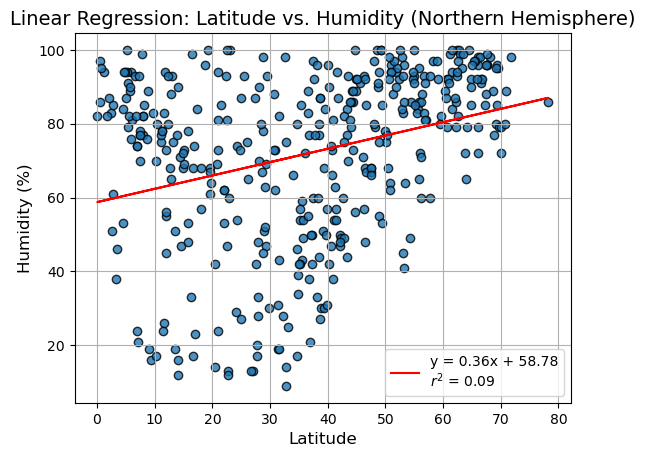

In [19]:
# Northern Hemisphere
# Perform linear regression for Latitude vs. Humidity in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Humidity"],          # Dependent variable: Humidity
    "Linear Regression: Latitude vs. Humidity (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Humidity (%)",                         # y-axis label
    "output_data/Fig_North_Lat_Humidity_Linear_Regression.png"    # Output file path
)

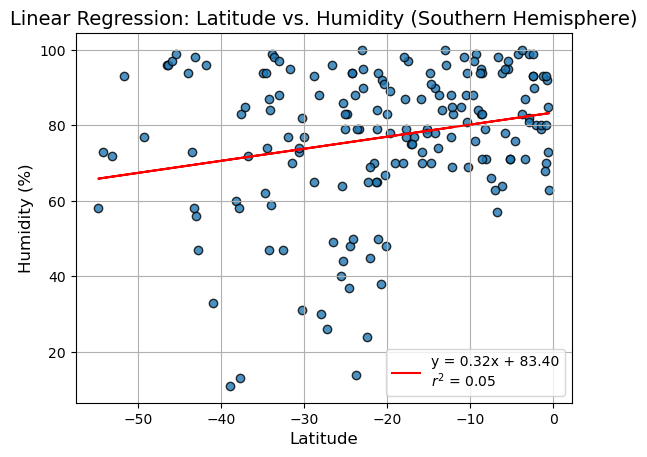

In [20]:
# Southern Hemisphere
# Perform linear regression for Latitude vs. Humidity in Southern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Humidity"],          # Dependent variable: Humidity
    "Linear Regression: Latitude vs. Humidity (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Humidity (%)",                         # y-axis label
    "output_data/Fig_South_Lat_Humidity_Linear_Regression.png"    # Output file path
)

**Northern Hemisphere:**
In the Northern Hemisphere, there is a weak positive linear relationship between the variables, indicating that as 
x increases, y tends to decrease slightly.

**Southern Hemisphere:**
In the Southern Hemisphere, there is an extremely weak positive linear relationship, suggesting that as x increases, y tends to increase very slightly. However, this relationship is almost negligible based on the low correlation coefficient.

### Cloudiness vs. Latitude Linear Regression Plot

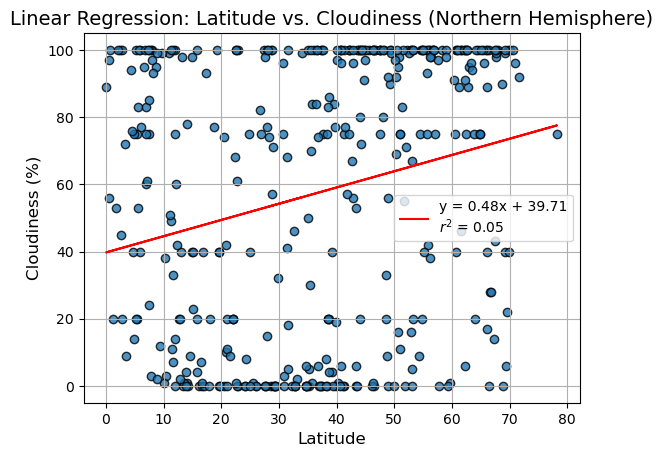

In [21]:
# Northern Hemisphere
# Perform linear regression for Latitude vs. Cloudiness in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Cloudiness"],        # Dependent variable: Cloudiness
    "Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Cloudiness (%)",                       # y-axis label
    "output_data/Fig_North_Lat_Cloudiness_Linear_Regression.png"  # Output file path
)

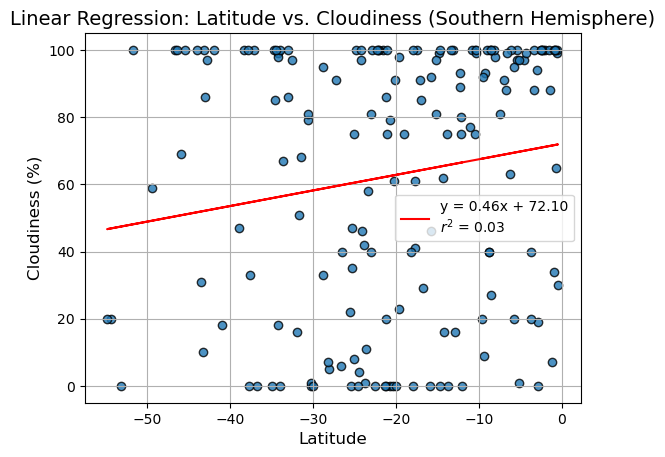

In [22]:
# Southern Hemisphere
# Perform linear regression for Latitude vs. Cloudiness in Southern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Cloudiness"],        # Dependent variable: Cloudiness
    "Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Cloudiness (%)",                       # y-axis label
    "output_data/Fig_South_Lat_Cloudiness_Linear_Regression.png"  # Output file path
)

In both the Northern and Southern Hemispheres, there are very weak positive linear relationships between the variables. These relationships suggest that changes in x are associated with small changes in y, and the relationships are not strongly indicative of any significant patterns or trends.
The low correlation coefficients indicate that the linear relationships between the variables are very weak, and other factors not considered in these equations may have a stronger influence on y.

### Wind Speed vs. Latitude Linear Regression Plot

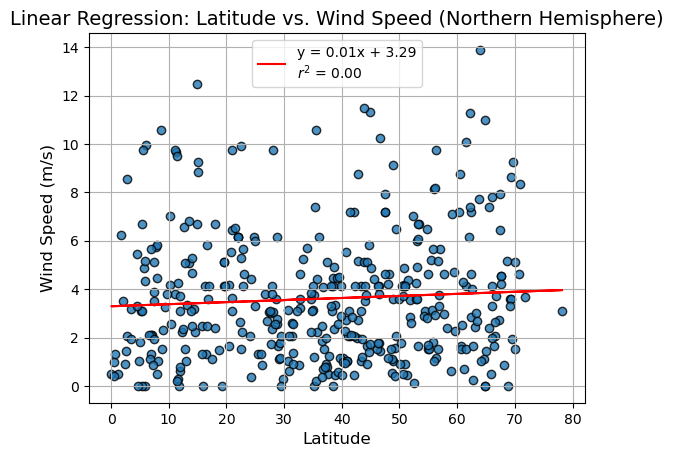

In [23]:
# Northern Hemisphere
# Perform linear regression for Latitude vs. Wind Speed in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Wind Speed"],        # Dependent variable: Wind Speed
    "Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Wind Speed (m/s)",                     # y-axis label
    "output_data/Fig_North_Lat_WindSpeed_Linear_Regression.png"  # Output file path
)





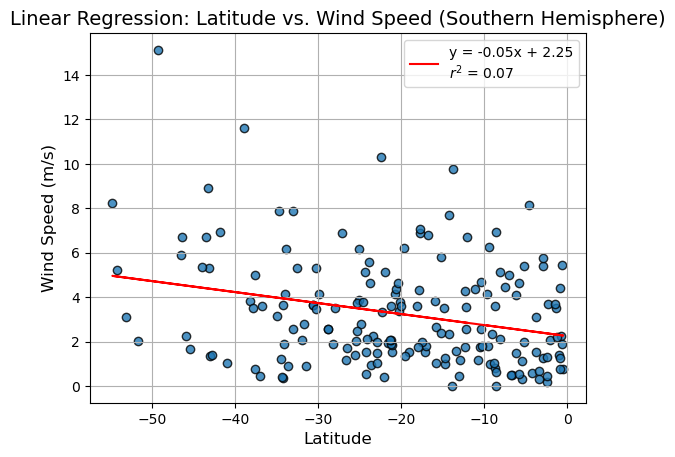

In [24]:
# Southern Hemisphere
# Perform linear regression for Latitude vs. Wind Speed in Southern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Wind Speed"],        # Dependent variable: Wind Speed
    "Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Wind Speed (m/s)",                     # y-axis label
    "output_data/Fig_South_Lat_WindSpeed_Linear_Regression.png"  # Output file path
)

In the Northern Hemisphere, there is an extremely weak positive linear relationship between the variables, and any changes in 
x are associated with very minimal changes in y.
In the Southern Hemisphere, there is a weak negative linear relationship, suggesting that as x increases, y tends to decrease slightly. However, the relationship is not strong, and the magnitude of change is relatively small.
These relationships indicate that the variables are not strongly correlated in either hemisphere.